# Import Libraries

In [308]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [309]:
# read the file
spam = pd.read_csv('spambase.DATA')

In [310]:
# print data frame
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [311]:
# change the column names
spam_new = spam.set_axis(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over','word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will','word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email','word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp','word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857','word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm','word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu','word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total','target'], axis=1)

In [312]:
spam_new.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [313]:
# number of emails and number of features 
print(spam_new.shape)

(4600, 58)


In [314]:
spam_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

# Data Preprocessing

In [315]:
# checking for duplicate rows and removing them
duplicated_rows = spam_new.duplicated()
num_duplicate_rows = sum(duplicated_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")
spam_new = spam_new.drop_duplicates()

Number of duplicate rows: 391


In [316]:
#checking for null values  
null_values = spam_new.isnull().sum()
sum_null_values = sum(null_values)
print("Number of null values",sum_null_values)

Number of null values 0


In [317]:
#checking for data duplication 
duplicate_rows = spam_new[spam_new.duplicated()]

# dropping the duplicate rows
spam_new.drop_duplicates(inplace=True)

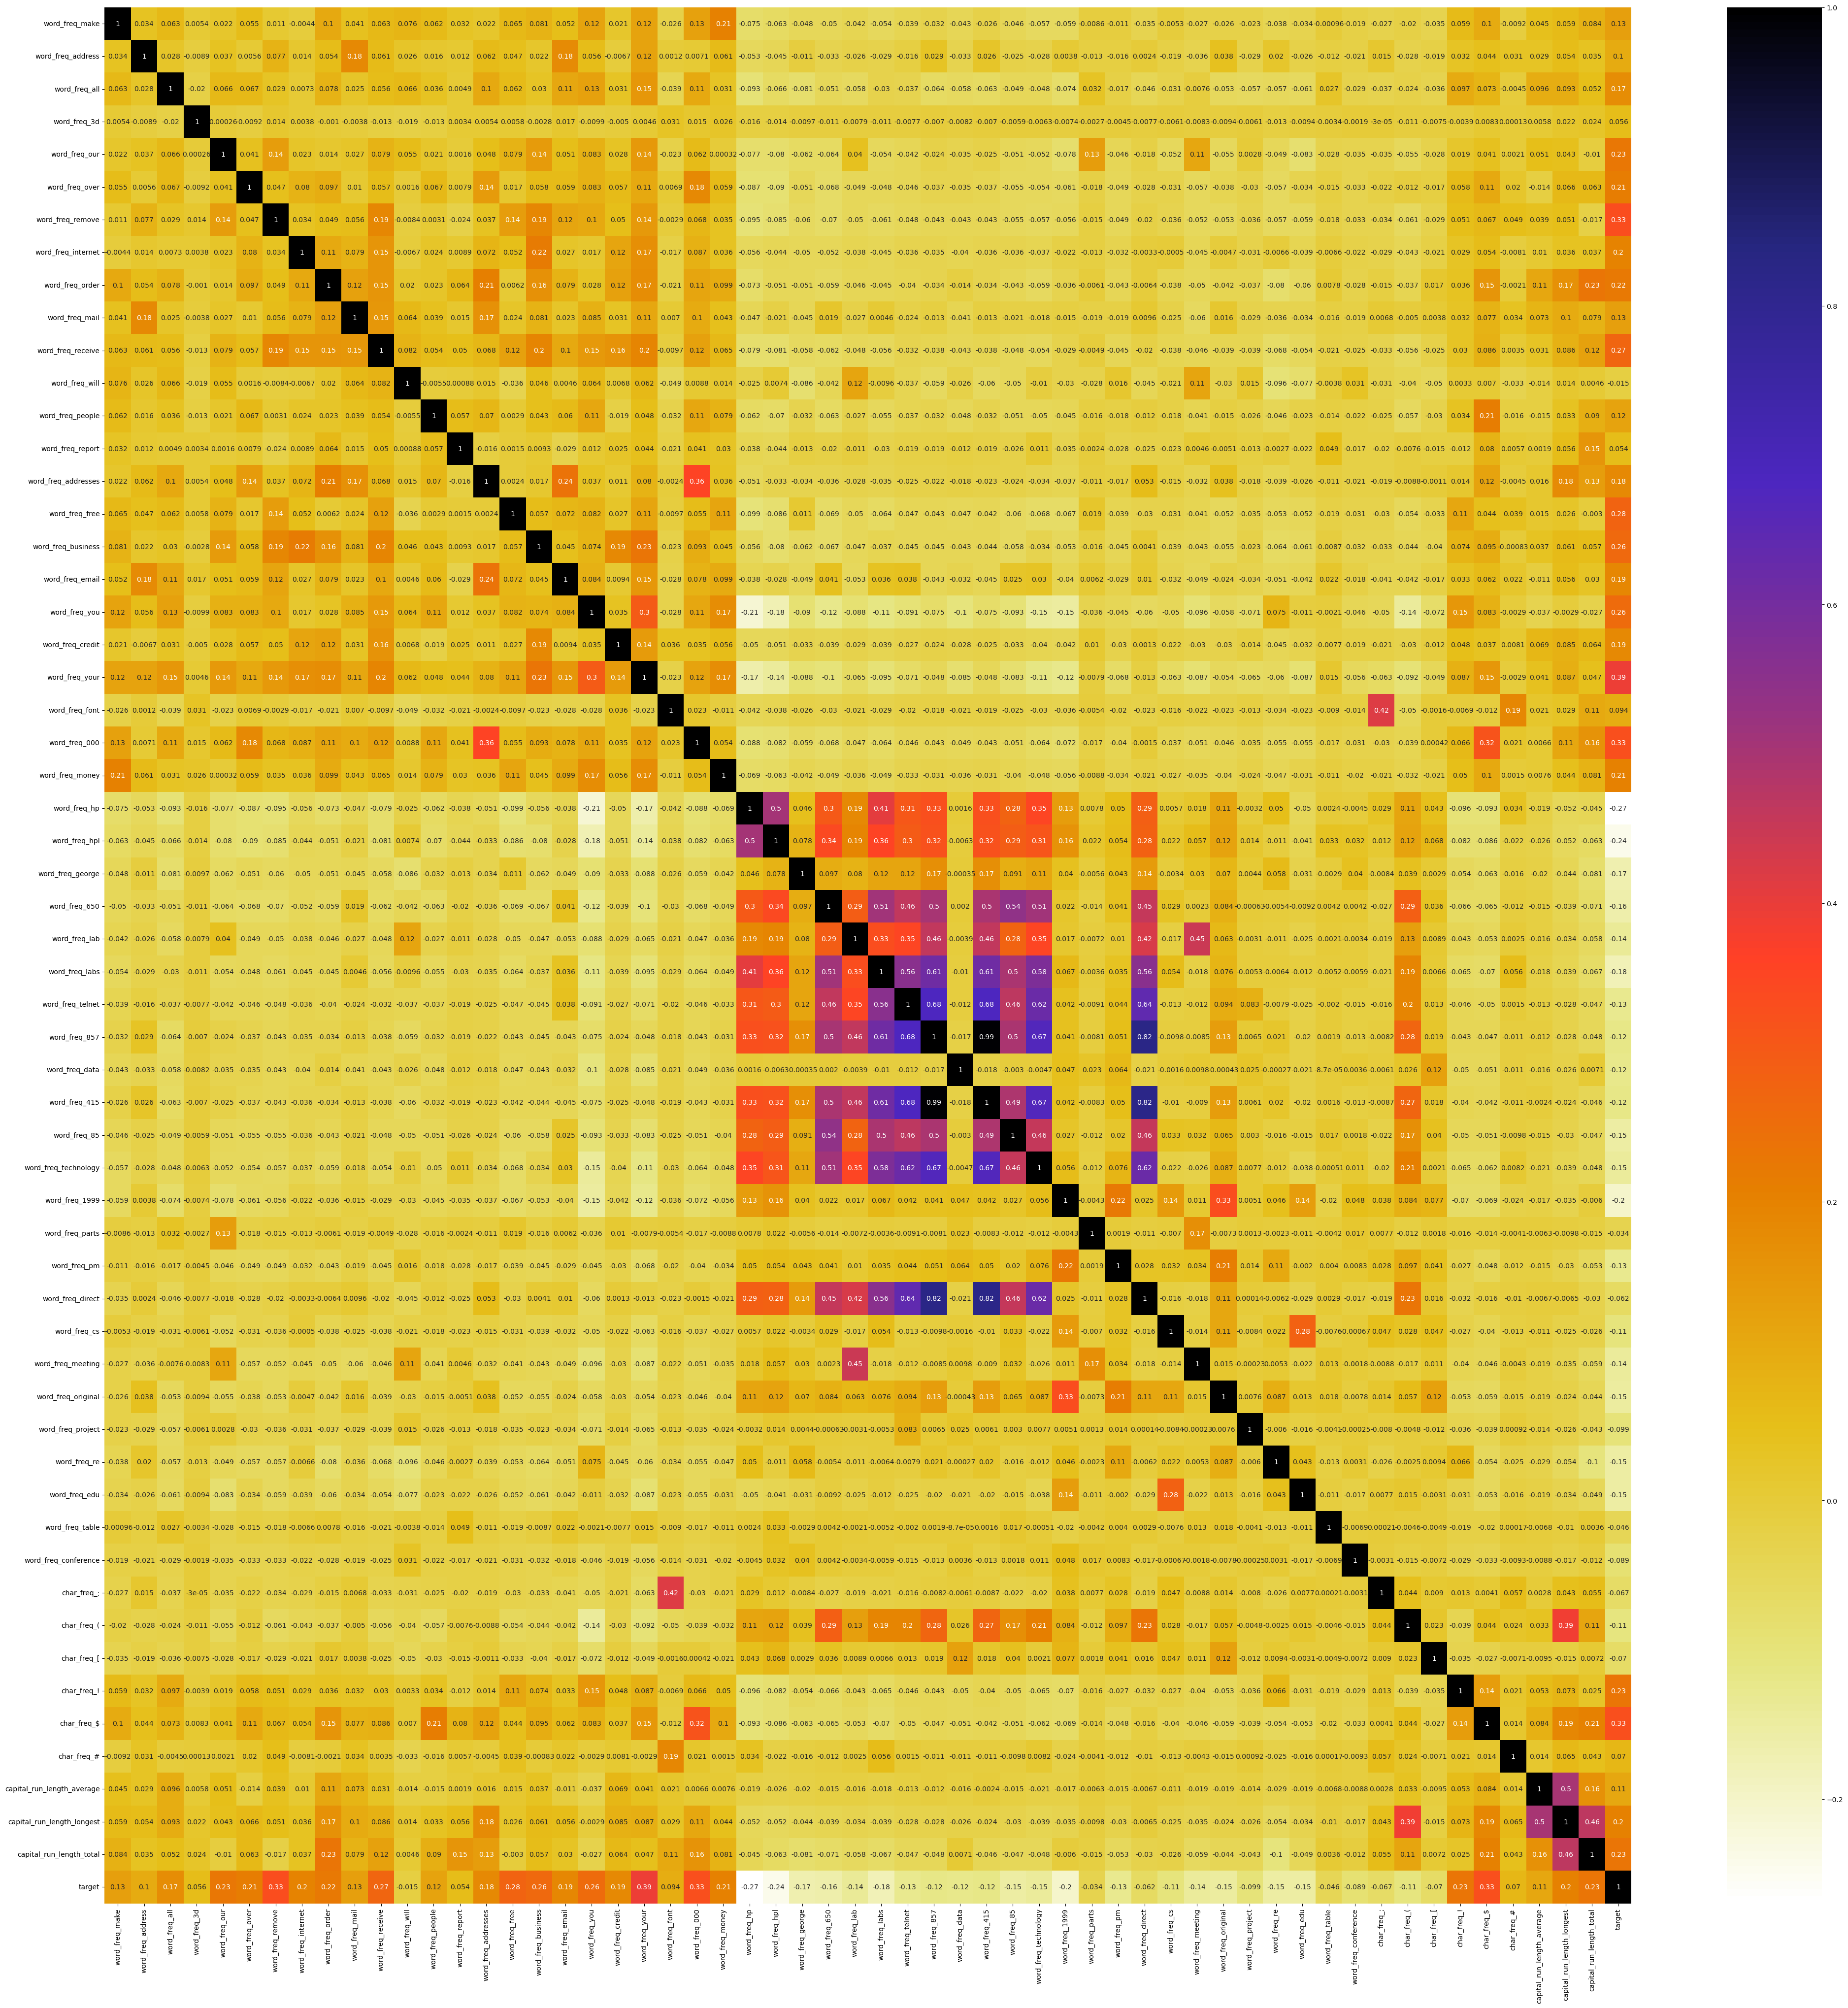

In [318]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = spam_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [319]:
# Finding and removing outliers using z-score method
z_scores = np.abs(zscore(X_train))
threshold = 3
outlier_indexes = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indexes])
y_train = y_train.drop(y_train.index[outlier_indexes])

# Split Dataset and Create target

In [320]:
# Split the data into input features and target variable
X = spam_new.drop('target', axis=1)
y = spam_new['target']

In [321]:
# splitting the data into training set = 70% and testing sets = 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [322]:
# standardize the input features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Calculating Number of Clusters using Elbow method

In [323]:
# find the optimal number of neighbors using the elbow method
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    scores.append(accuracy_score(y_test, y_pred))

C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

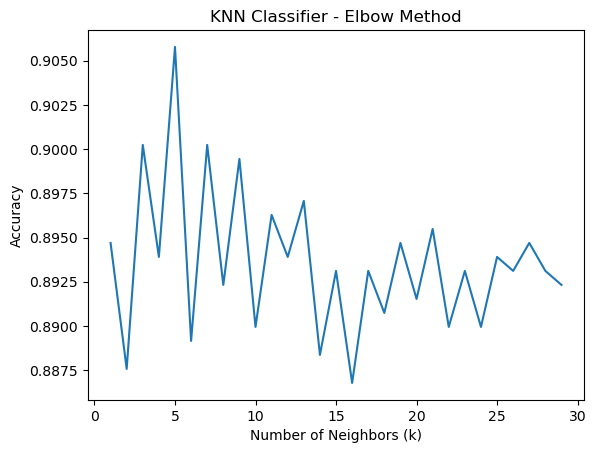

In [324]:
plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier - Elbow Method')
plt.show()

In [325]:
optimal_k = np.argmax(scores) + 1
print(f"Optimal number of neighbors: {optimal_k}")

Optimal number of neighbors: 5


# Model training using KNN

In [326]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9057798891528107


C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [327]:
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Confusion matrix:
[[699  41]
 [ 78 445]]


In [328]:
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       740
           1       0.92      0.85      0.88       523

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


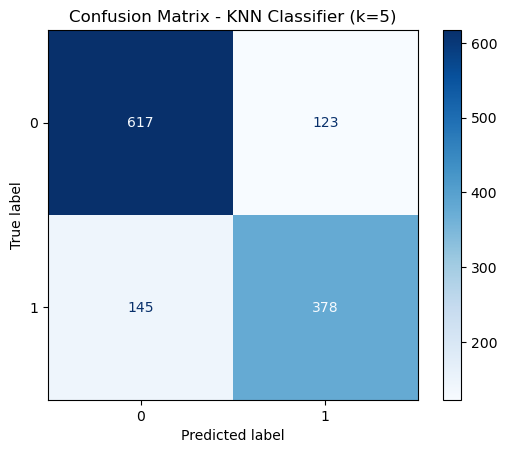

In [329]:
# plot confusion matrix for test set
plot_confusion_matrix(spam_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN Classifier (k=5)")
plt.show()

# Validation Model

In [330]:
# perform 10-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)

# print the mean score and standard deviation
print(f'Mean cross-validation score: {cv_scores.mean():.3f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.3f}')


C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

Mean cross-validation score: 0.780
Standard deviation of cross-validation scores: 0.023


C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
C:\Users\jathusharini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

# Decision Tree as a Base model

In [331]:
from sklearn.tree import DecisionTreeClassifier

# create the classifier object
dt_clf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
dt_clf.fit(X_train, y_train)

# predict the target variable for the test data
y_pred = dt_clf.predict(X_test)

# evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 0.9176563737133808


In [332]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[685  55]
 [ 49 474]]


In [333]:
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.90      0.91      0.90       523

    accuracy                           0.92      1263
   macro avg       0.91      0.92      0.92      1263
weighted avg       0.92      0.92      0.92      1263



In [334]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Print the decision tree as text
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- char_freq_$ <= 0.04
|   |--- word_freq_remove <= 0.05
|   |   |--- char_freq_! <= 0.51
|   |   |   |--- word_freq_free <= 0.23
|   |   |   |   |--- capital_run_length_average <= 8.20
|   |   |   |   |   |--- word_freq_000 <= 0.35
|   |   |   |   |   |   |--- word_freq_hp <= 0.02
|   |   |   |   |   |   |   |--- word_freq_business <= 0.09
|   |   |   |   |   |   |   |   |--- capital_run_length_longest <= 12.50
|   |   |   |   |   |   |   |   |   |--- word_freq_internet <= 8.49
|   |   |   |   |   |   |   |   |   |   |--- word_freq_money <= 11.12
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |   |--- word_freq_money >  11.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- word_freq_internet >  8.49
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- capital_run_length_longest >  12.50
|   |   |   |   |   |   |   |   |   |--- wo

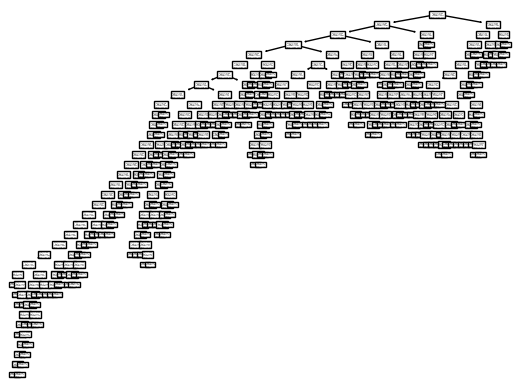

In [335]:
    tree.plot_tree(clf);